In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your merged and cleaned dataset
df = pd.read_csv("../data/clean/ilostat_merge.csv")

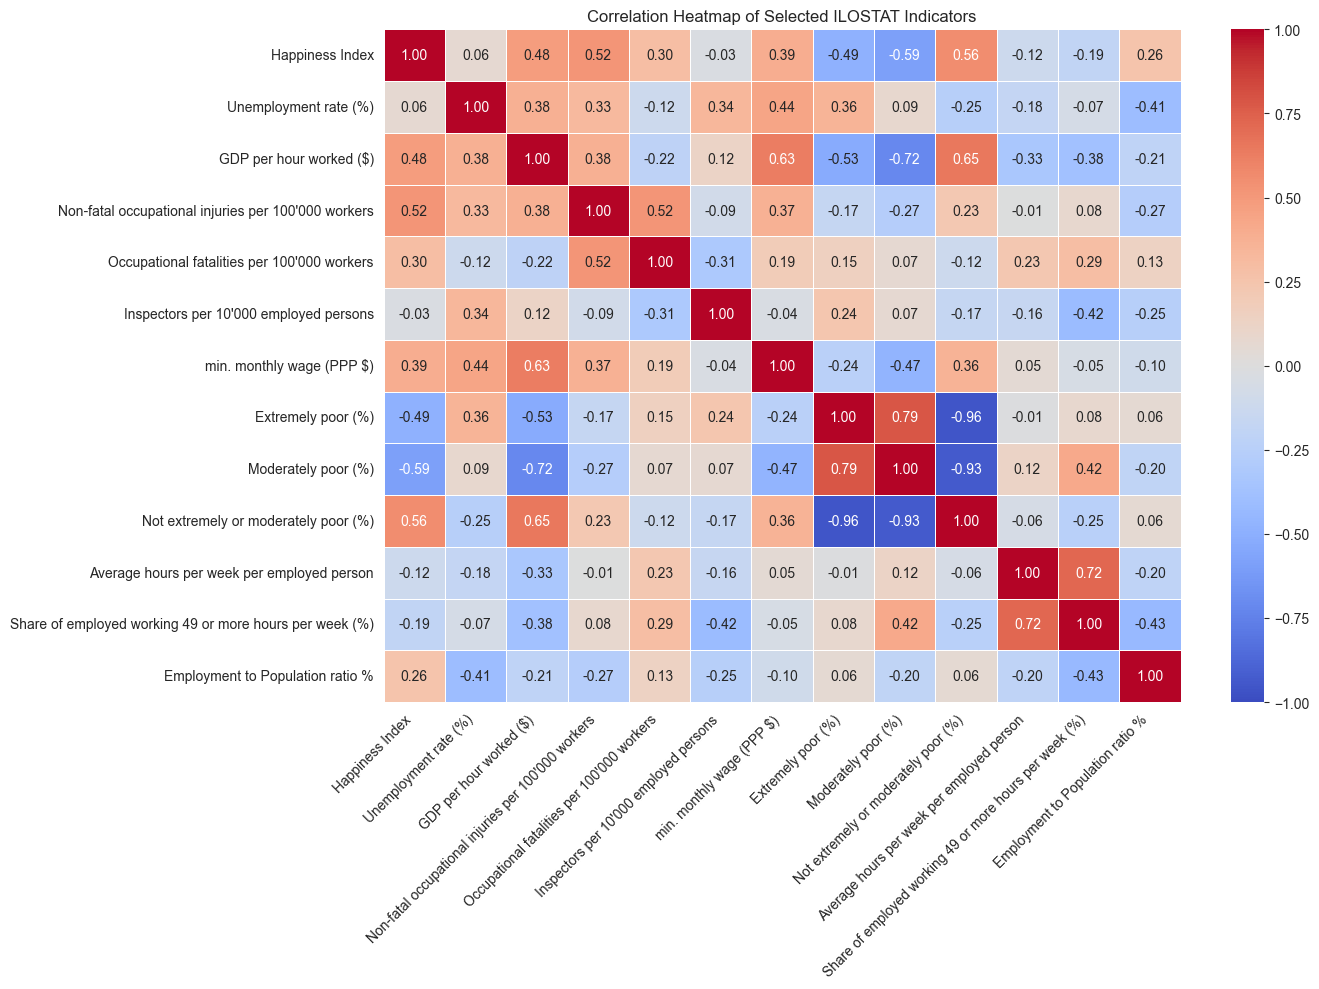

In [3]:
# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# === Filter only available columns ===
available_columns = [col for col in numeric_data if col in df.columns]
filtered_df = df[available_columns].dropna()

# === Generate heatmap ===
plt.figure(figsize=(14, 10))
correlation_matrix = filtered_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Selected ILOSTAT Indicators")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [4]:


# Columns you'd like to test against Happiness Index
target = "Happiness Index"
columns_to_compare = [
    "Unemployment rate (%)",
    "GDP per hour worked ($)",
    "Non-fatal occupational injuries per 100'000 workers",
    "Occupational fatalities per 100'000 workers",
    "Inspectors per 10'000 employed persons",
    "min. monthly wage (PPP $)",
    "Extremely poor (%)",
    "Moderately poor (%)",
    "Not extremely or moderately poor (%)",
    "Average hours per week per employed person",
    "Share of employed working 49 or more hours per week (%)",
    "Employment to Population ratio %"
]

# Compute pairwise correlation (Happiness vs each column)
results = []
for col in columns_to_compare:
    if col in df.columns:
        subset = df[[target, col]].dropna()
        if len(subset) > 1:
            corr = subset[target].corr(subset[col])
            results.append((col, round(corr, 3), len(subset)))

# Format and display results
correlation_df = pd.DataFrame(results, columns=["Indicator", "Correlation with Happiness", "Compared Rows"])
correlation_df.sort_values("Correlation with Happiness", ascending=False, inplace=True)
print(correlation_df)

                                            Indicator  \
1                             GDP per hour worked ($)   
5                           min. monthly wage (PPP $)   
8                Not extremely or moderately poor (%)   
2   Non-fatal occupational injuries per 100'000 wo...   
11                   Employment to Population ratio %   
4              Inspectors per 10'000 employed persons   
0                               Unemployment rate (%)   
3         Occupational fatalities per 100'000 workers   
9          Average hours per week per employed person   
10  Share of employed working 49 or more hours per...   
6                                  Extremely poor (%)   
7                                 Moderately poor (%)   

    Correlation with Happiness  Compared Rows  
1                        0.669            147  
5                        0.669            133  
8                        0.664            109  
2                        0.320             71  
11                

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/happiness_correlation_plot.png'

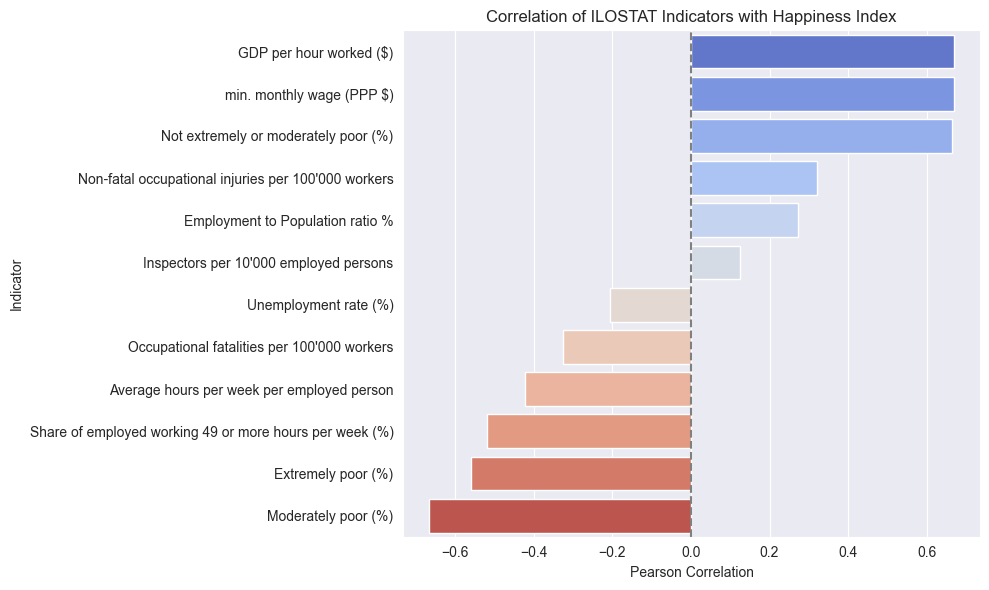

In [6]:
# Plot correlation bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x="Correlation with Happiness", y="Indicator", hue="Indicator",palette="coolwarm")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Correlation of ILOSTAT Indicators with Happiness Index")
plt.xlabel("Pearson Correlation")
plt.ylabel("Indicator")
plt.tight_layout()
plt.savefig("outputs/happiness_correlation_plot.png", dpi=300)
plt.show()

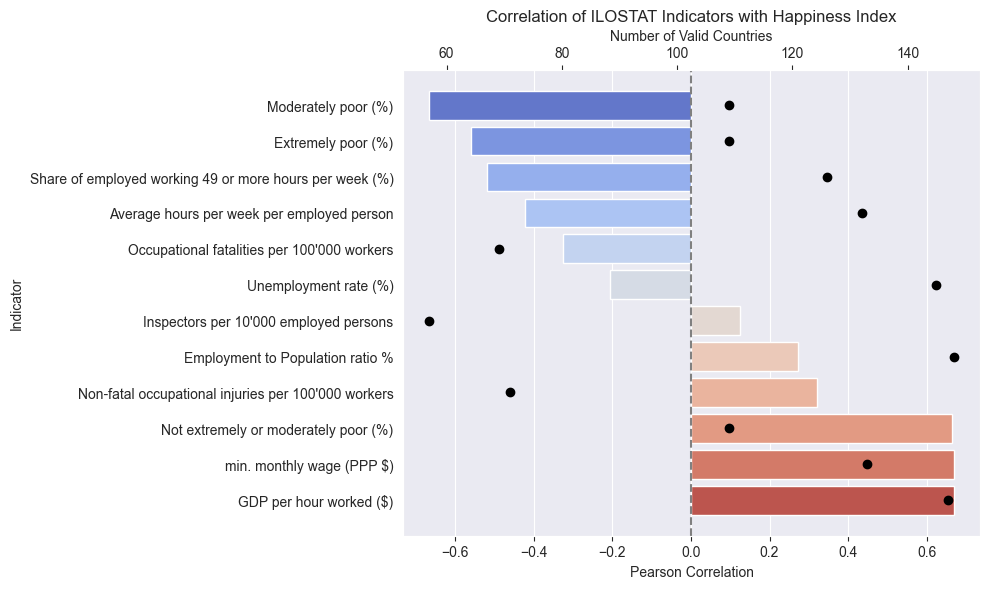

In [13]:
# Compute pairwise correlations and row counts
correlation_data = []
for col in columns_to_compare:
    if col in df.columns:
        subset = df[[target, col]].dropna()
        if len(subset) > 1:
            corr = subset[target].corr(subset[col])
            correlation_data.append({
                "Indicator": col,
                "Correlation with Happiness": round(corr, 3),
                "Rows Compared": len(subset)
            })

# Build the correlation DataFrame
corr_df = pd.DataFrame(correlation_data)
corr_df.sort_values("Correlation with Happiness", inplace=True)

# Create main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Correlation barplot
sns.barplot(
    data=corr_df,
    x="Correlation with Happiness",
    y="Indicator",
    hue="Indicator",
    palette="coolwarm",
    ax=ax1,
    legend=False
)
ax1.axvline(0, color='gray', linestyle='--')
ax1.set_title("Correlation of ILOSTAT Indicators with Happiness Index")
ax1.set_xlabel("Pearson Correlation")
ax1.set_ylabel("Indicator")

# Add secondary axis for row counts
ax2 = ax1.twiny()
ax2.scatter(corr_df["Rows Compared"], corr_df["Indicator"], color="black", marker="o", label="Row Count")
ax2.set_xlabel("Number of Valid Countries")
ax2.grid(False)

plt.tight_layout()
plt.show()
